In [1]:
import math
import numpy
import matplotlib
import matplotlib.pyplot as plt

In [4]:
"""
Generate Gaussian noise
1. Inverse transforming
2. Box-Muller method
"""


class GaussianNoiseSimulation:
    def __init__(self):
        pass

    """
    1. Inverse transforming method
    using the method given by 26.2.23 formula in 'Handbook of 
    Mathematical Functions With Formulas, Graphs, and Mathematical Tables'
    """

    """p is the generated uniform variable"""
    def numericalApproximation(self, t):
        c0 = 2.515517
        c1 = 0.802853
        c2 = 0.010328
        d1 = 1.432788
        d2 = 0.189269
        d3 = 0.001308
        denominator = 1 + t*(d1 + t*(d2 + d3*t))
        nominator = c0 + t*(c1+c2*t)
        return t - nominator/denominator

    def inverse(self, p) -> float:
        if p < 0.5:
            t = math.sqrt(-2 * math.log(p))
            return - self.numericalApproximation(t)
        else:
            t = math.sqrt(-2 * math.log(1-p))
            return self.numericalApproximation(t)



    def inverse_transform_method(self, n):
        u = numpy.random.uniform(0, 1, n)
        generated_gn = []
        for i in range(n):
            generated_gn.append(self.inverse(u[i]))
        return generated_gn

    """generate n uniform var and computes the corresponding normal var"""

    """
    2. Box-Muller method
    input: n
    output: 2*n normal random numbers
    """

    def box_muller_method(self, n):
        u1 = numpy.random.uniform(0, 1, n)
        u2 = numpy.random.uniform(0, 1, n)
        generated_gn = []
        for i in range(n):
            n1 = math.sqrt(-2 * math.log(u1[i])) * math.cos(2 * math.pi * u2[i])
            n2 = math.sqrt(-2 * math.log(u1[i])) * math.sin(2 * math.pi * u2[i])
            generated_gn.extend([n1, n2])

        return generated_gn

    def generateNGn(self, n, method):
        if method == 'inverse':
            return self.inverse_transform_method(n)
        elif method == 'box-muller':
            return self.box_muller_method(n)

    def draw_histogram(self, data, name):
        matplotlib.rcParams['axes.unicode_minus'] = False
        plt.hist(data, bins=100, density=True, facecolor="blue", edgecolor="black")
        plt.xlabel("x")
        plt.ylabel("probability")
        plt.title("Distribution using " + name)
        plt.show()

    def cal_sigma(self, data, mu):
        sum = 0
        for i in range(len(data)):
            try:
                sum += math.pow(data[i] - mu, 2)
            except:
                print(data[i], mu)
                # given the hint by Numerical solution of SDE
        return sum / (len(data) - 1)

    def cal_mu(self, data):
        s = sum(data)
        return s / len(data)

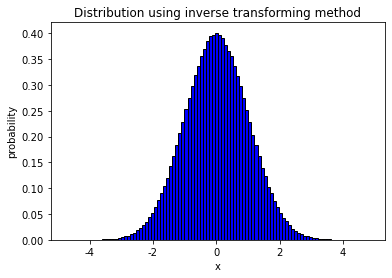

Inverse method: sigma =  0.998660955112099 , mu =  -0.0012163668532336463


In [5]:
gn = GaussianNoiseSimulation()
num = 1_000_000  # number of normal variables
data_inverse = gn.generateNGn(num, 'inverse')
sigma_inverse = gn.cal_sigma(data_inverse, 0)
mu_inverse = gn.cal_mu(data_inverse)
gn.draw_histogram(data_inverse, "inverse transforming method")
print("Inverse method: sigma = ", sigma_inverse,", mu = ", mu_inverse)

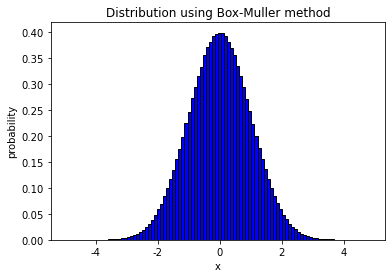

Box-Muller method: sigma =  1.0010904615491203 , mu =  -0.00023316123214969968


In [6]:
data_box_muller = gn.generateNGn(num, 'box-muller')
sigma_box_muller = gn.cal_sigma(data_box_muller, 0)
mu_box_muller = gn.cal_mu(data_box_muller)
gn.draw_histogram(data_box_muller, "Box-Muller method")


print("Box-Muller method: sigma = ", sigma_box_muller, ", mu = ", mu_box_muller)
